# PyTorch Workflow

Let's explore a an example PyTorch end-to-end workflow



In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
# https://pytorch.org/docs/stable/nn.html torch.nn documents
import matplotlib.pyplot as plt
# Check PyTorch version
torch.__version__

'2.2.1+cu121'

## 1. Data (preparing and loading)

* Excel speadsheet

* Images of any kind

* Videos (Yotube has lots of data),

* Audio like songs or podcasts

* DNA

* Text

Machine learning is a game of two parts:

1. Get data into a numerical representation

2. Build a model to learn patterns in that numerical representation

To showcase this,let's create *know* data using the linear regression formula.


We'll use a linear regression formula to make a straight line with *known* **parameters**

In [3]:
# Linear regression formula
# Y = a +bX
# Create *known* parameters
weight = 0.7# b
bias = 0.3# a

# Create
start = 0
end = 1
step = 0.02
X=torch.arange(start,end,step).unsqueeze(dim=1) # input
y = bias + weight*X # output

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X),len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data

In [5]:
# Create a train/test split
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

How might we better visualize our data

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data,test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

  # Plot test data in yellow
  plt.scatter(test_data,test_labels,c="y",s=4,label="Testing data")

  # Are predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

  # Show the lagend
  plt.legend(prop={"size":14});

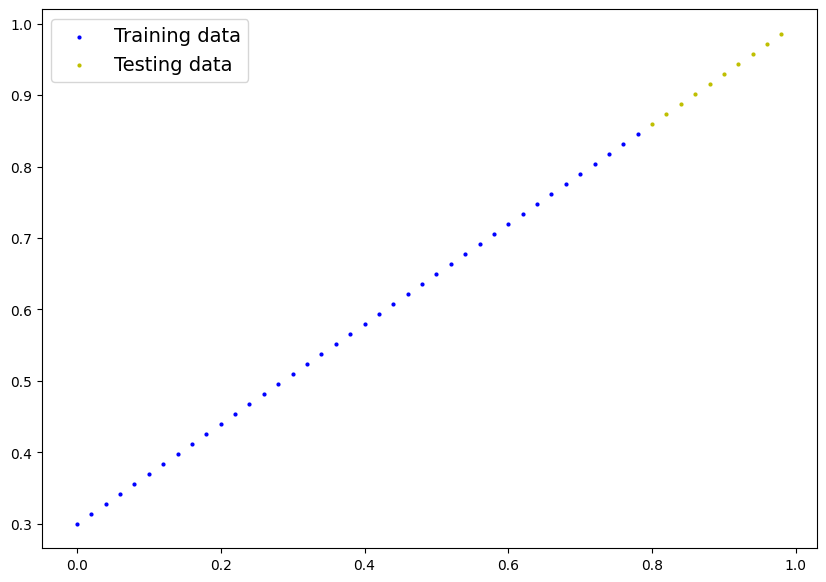

In [7]:
plot_predictions()

## 2. Build model

Our first PyTorch model!

What our model does:

* Start with random values(weight & bias)

* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Throught two main algorithms
1. Gradient descent

2. Backpropagation

* Turkçesi modelimiz rasgele sayılarla başlayacak ve gradient descent kullanarak (weight & bias) parametrelerini günceller



In [8]:
#import torch.nn as nn
#import torch.nn.functional as F

#class Model(nn.Module):
    #def __init__(self):
        #super().__init__()
        #self.conv1 = nn.Conv2d(1, 20, 5)
        #self.conv2 = nn.Conv2d(20, 20, 5)

    #def forward(self, x):
       # x = F.relu(self.conv1(x))
        #return F.relu(self.conv2(x))

In [9]:
from torch import nn # nn sinir ağları yapı taşı katmanıdır sinir ağı modelidir
# Create linear regression model class
class LinearRegressionModel(nn.Module):# ınheritance  yani kalıtım başka bir sınıfın fonksyiyonlarını kalıtım yolu ile alıyoruz
  # -< almost everything in PyTorch inherhits from nn.Module(PyTorch hemen hemen her şey nn.Module den miras alır) yani bir  herhangi bir PyTorch modeli oluşturmak istersek
  # Bu sınıftan kalıtım almak zorundayız
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,# <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True,# if requires_grad=True model use gradient descent
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    # Forward method to define the computation in the model
    # forward() defines the computation in the model modeldeki hesaplamayı tanımlar
    def forward(self,x:torch.Tensor) -> torch.Tensor:#<- "x" is the input data
      return self.weights * x + self.bias # this is the linear regression formula
      # forward() methodu bizim kulanımımızda doğrusal regresyon fonksiyonudur

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computationel graphs (another word for neural network can be considered a computationel)

* torch.nn.Parameter - what parameters should our model try and learn,often a PyTorch layer from torch.nn will set these for us

* torch.nn.Module - The base class for all neural network modules,if you subclass it you should overwrite forward()

* torch.optim - this where the optimizers in PyTorch live they will help with gradient descent

* def forward() - All nn.Module subclasses require you to overwrite forward(),this method defines what happend in the forward computation
turkish:Tüm nn.Module alt sınıfları, forward() fonksiyonunu geçersiz kılmanızı gerektirir bu method ileriye dönük hesaplamada ne olacağını tanımlar

extra resources:https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

Now we've created a model,let's see what's inside

So we can check our model parameters or what's inside our model using .parameters()

In [14]:
# Create a random seed
torch.manual_seed(1001)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()
# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([1.0076], requires_grad=True),
 Parameter containing:
 tensor([1.6678], requires_grad=True)]

These are model parameters

In [15]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([1.0076])), ('bias', tensor([1.6678]))])

In [16]:
weight,bias

(0.7, 0.3)